# Credit Risk Analysis for Default Loan Dataset


- Given a loan dataset with information on each customer, we are to design a predictive model which will firstly predict the chances of any given customer defaulting payments and further estimating the corresponding losses.


In [1]:
# Goal: Create a function that considers all the properties of a loan and predict/estimate the loss.
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

df= pd.read_csv('Task 3 and 4_Loan_Data.csv')

#### Exploring the dataset and its parameters.

In [2]:
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [3]:
df.shape

(10000, 8)

In [4]:
df.dtypes

customer_id                   int64
credit_lines_outstanding      int64
loan_amt_outstanding        float64
total_debt_outstanding      float64
income                      float64
years_employed                int64
fico_score                    int64
default                       int64
dtype: object

In [5]:
df.default.unique()

array([0, 1], dtype=int64)

In [6]:
df.years_employed.nunique()

11

In [7]:
df.years_employed.value_counts()

5     2574
4     2116
3     1763
6     1670
2      688
7      664
8      275
1      164
9       43
0       32
10      11
Name: years_employed, dtype: int64

In [8]:
df.columns

Index(['customer_id', 'credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score',
       'default'],
      dtype='object')

### Training the model using Logistic Regression, Random Forest Classifier, Support Vector Classifier, XGBoost Classifier (Individually) as the underlying algorithm for calculating expected loss on a given loan instance

In [9]:
# Step 1: Preparing Features and target

X=df[['credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score']]
Y=df['default']

In [10]:
X.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score
0,0,5221.545193,3915.471226,78039.38546,5,605
1,5,1958.928726,8228.752520,26648.43525,2,572
2,0,3363.009259,2027.830850,65866.71246,4,602
3,0,4766.648001,2501.730397,74356.88347,5,612
4,1,1345.827718,1768.826187,23448.32631,6,631


In [11]:
# Step 2: Splitting dataset into training dataset and testing dataset.

X_train, X_test, Y_train, Y_test= train_test_split(X, Y , test_size=0.2, random_state=11)

In [12]:
#Step 3: Scaling the features (also called as normalization, its process of bringing features on a same scale 
 # which is standard deviation 1 and mean 0 for all features.)

scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [13]:
# Step 4 v1: Training the Logistic Regression Model

model1=LogisticRegression(random_state=11)
model1.fit(X_train_scaled,Y_train)

LogisticRegression(random_state=11)

In [14]:
# Step 4 v2: Training for Random Forest Classifier

model2=RandomForestClassifier(n_estimators=100, random_state=11)
model2.fit(X_train_scaled,Y_train)

RandomForestClassifier(random_state=11)

In [15]:
# Step 4 v3:  Training for Support Vector Classifier
model3 = SVC(probability=True, random_state=11)
model3.fit(X_train_scaled,Y_train)

SVC(probability=True, random_state=11)

In [16]:
# Step 4 v4: XG Boosting Classifier
model4 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=11)
model4.fit(X_train_scaled,Y_train)

C:\Users\prana\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [21:39:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=11, ...)

### Combining the models into a meta-model using a Stack Classifier, this meta-model will combine the predictions of each base model and learn to do it effectively, so that the expected probability will be an optimized combination of all the above models.

In [17]:
# Step 4 v5

# Defining a stacking classifier (meta-model)
model5 = StackingClassifier(estimators=[
    ('lr', model1),    # Logistic Regression
    ('rf', model2),    # Random Forest
    ('svc', model3),   # Support Vector Classifier
    ('xgb', model4)     # XGBoosting Classifier
], final_estimator=LogisticRegression())  # Meta-model can be any classifier

# Train the stacking classifier
model5.fit(X_train_scaled, Y_train)


C:\Users\prana\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [21:39:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [21:39:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [21:39:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\

StackingClassifier(estimators=[('lr', LogisticRegression(random_state=11)),
                               ('rf', RandomForestClassifier(random_state=11)),
                               ('svc', SVC(probability=True, random_state=11)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categ...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                           

In [18]:
model_numbers={
    1: model1 ,# Logistic Regression
    2: model2, # Random Forest Classifier
    3: model3, # Support Vector Classifier
    4: model4, # XGBoosting Classifier
    5: model5, # Stacking Classifier
        # use 6 for weighted ensemble Strategy
    }

### Combining the results of the models utilizing weights to form a Custom Weighted Ensemble Strategy, I have implemented this model within the calculate_expected_loss function

In [19]:
#Step 5: Function for calculating expected loss based on the Predictive model

def calculate_expected_loss(credit_lines_outstanding, loan_amt_outstanding,
       total_debt_outstanding, income, years_employed, fico_score, model_number):
    # model variable used for defining which model to use while calculating
    # Putting these inputs into a dataframe and scaling them
    
    model_numbers={
    1:model1 ,# Logistic Regression
    2: model2, # Random Forest Classifier
    3: model3, # Support Vector Classifier
    4: model4, # Gradient Boosting Classifier
    5: model5, # Stacking Classifier
    # use 6 for weighted ensemble Strategy
    }
    
    loan_data=pd.DataFrame({
        'credit_lines_outstanding': [credit_lines_outstanding],
        'loan_amt_outstanding': [loan_amt_outstanding],
        'total_debt_outstanding': [total_debt_outstanding],
        'income': [income],
        'years_employed': [years_employed],
        'fico_score': [fico_score]
    })
    
    model_weights={
        1: 0.3,
        2: 0.3,
        3: 0.1,
        4: 0.3
    }
    
    loan_data_scaled=scaler.transform(loan_data)
    
    if model_number != 6:
        # Selecting the model based on the model numbers
        selected_model = model_numbers[model_number]
        
        # Predict the probability of default (PD)
        PD_prob = selected_model.predict_proba(loan_data_scaled)[:, 1]  # Probability of default
        PD_prob=PD_prob[0]
        
    else:
        # For model number 6, calculate the weighted ensemble prediction
        PD_prob = 0
        for model_num, weight in model_weights.items():
            model = model_numbers[model_num]
            model_pd_prob = model.predict_proba(loan_data_scaled)[:, 1]  # Probability of default
            PD_prob += weight * model_pd_prob  # Weighted sum of probabilities
            
        PD_prob = PD_prob[0]  # Final weighted probability
    
    
    #Given
    recovery_rate=0.10
    
    #Calculating expected loss
    expected_loss= (1-recovery_rate)* PD_prob * loan_amt_outstanding
    
    return expected_loss

In [20]:
# Example for logistic Regression

example_loss = calculate_expected_loss(credit_lines_outstanding=3, loan_amt_outstanding=5000, 
                                       total_debt_outstanding=3000, income=50000, years_employed=3, fico_score=620,model_number=1)
print(f"Expected Loss: ${example_loss:.2f}")

Expected Loss: $140.08


In [21]:
# Example for Random Forest Classifier

example_loss = calculate_expected_loss(credit_lines_outstanding=3, loan_amt_outstanding=5000, 
                                       total_debt_outstanding=3000, income=50000, years_employed=3, fico_score=620,model_number=2)
print(f"Expected Loss: ${example_loss:.2f}")

Expected Loss: $2925.00


In [22]:
# Example for Support Vector Classifier

example_loss = calculate_expected_loss(credit_lines_outstanding=3, loan_amt_outstanding=5000, 
                                       total_debt_outstanding=3000, income=50000, years_employed=3, fico_score=620,model_number=3)
print(f"Expected Loss: ${example_loss:.2f}")

Expected Loss: $63.82


In [23]:
# Example for XG Boosting Classifier

example_loss = calculate_expected_loss(credit_lines_outstanding=3, loan_amt_outstanding=5000, 
                                       total_debt_outstanding=3000, income=50000, years_employed=3, fico_score=620,model_number=4)
print(f"Expected Loss: ${example_loss:.2f}")

Expected Loss: $4402.44


In [24]:
# Example for Stacking Classifier

example_loss = calculate_expected_loss(credit_lines_outstanding=3, loan_amt_outstanding=5000, 
                                       total_debt_outstanding=3000, income=50000, years_employed=3, fico_score=620,model_number=5)
print(f"Expected Loss: ${example_loss:.2f}")

Expected Loss: $316.05


In [25]:
# Example for Weighted Ensemble Strategy

example_loss = calculate_expected_loss(credit_lines_outstanding=3, loan_amt_outstanding=5000, 
                                       total_debt_outstanding=3000, income=50000, years_employed=3, fico_score=620,model_number=6)
print(f"Expected Loss: ${example_loss:.2f}")

Expected Loss: $2246.64


### Now that we have results from 6 different models we can compare their accuracies as follows:

In [26]:
model_names={
    1: "Logistic Regression" ,# Logistic Regression
    2: "Random Forest Classifier", # Random Forest Classifier
    3: "Support Vector Classifier", # Support Vector Classifier
    4: "XGBoosting Classifier", # XGBoosting Classifier
    5: "Stacking Classifier", # Stacking Classifier
        # use 6 for weighted ensemble Strategy
    }
model_weights={
    1: 0.3,
    2: 0.3,
    3: 0.1,
    4: 0.3
}

# Step 1: Prepare a function to evaluate models with additional metrics
def evaluate_models(X_test_scaled, Y_test):
    results = []
    model_numbers={
    1: model1 ,# Logistic Regression
    2: model2, # Random Forest Classifier
    3: model3, # Support Vector Classifier
    4: model4, # XGBoosting Classifier
    5: model5, # Stacking Classifier
        # use 6 for weighted ensemble Strategy
    }
    # Loop through each model in the model_numbers dictionary
    for model_num, model in model_numbers.items():
        # Make predictions
        predictions = model.predict(X_test_scaled)
        predicted_proba = model.predict_proba(X_test_scaled)[:, 1] 
        
        # Calculate metrics
        accuracy = accuracy_score(Y_test, predictions)
        precision = precision_score(Y_test, predictions)
        recall = recall_score(Y_test, predictions)
        f1 = f1_score(Y_test, predictions)
        roc_auc = roc_auc_score(Y_test, predicted_proba)
        
        # Append results to the list
        results.append({
            'Model': model_names[model_num],
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        })
    
    # Create a DataFrame for the results
    results_df = pd.DataFrame(results)
    return results_df


# Add the weighted ensemble model to the model_dict as I calculated for it directly in the function
def weighted_ensemble_predict(X):
    weighted_sum = 0
    for model_num, weight in model_weights.items():
        model = model_numbers[model_num]
        model_pd_prob = model.predict_proba(X)[:, 1]
        weighted_sum += weight * model_pd_prob
    return weighted_sum

# Include weighted ensemble model in the model_dict
model_numbers[6] = None  # Placeholder for the weighted ensemble


# Step 2: Evaluate the models using the test set
accuracy_results = evaluate_models(X_test_scaled, Y_test)




# Evaluate the weighted ensemble
weighted_predictions = (weighted_ensemble_predict(X_test_scaled) > 0.5).astype(int)
weighted_accuracy = accuracy_score(Y_test, weighted_predictions)
weighted_precision = precision_score(Y_test, weighted_predictions)
weighted_recall = recall_score(Y_test, weighted_predictions)
weighted_f1 = f1_score(Y_test, weighted_predictions)
weighted_roc_auc = roc_auc_score(Y_test, weighted_ensemble_predict(X_test_scaled))

# Append the weighted ensemble results to the results list
accuracy_results = accuracy_results.append({
    'Model': 'Weighted Ensemble',  # Weighted Ensemble
    'Accuracy': weighted_accuracy,
    'Precision': weighted_precision,
    'Recall': weighted_recall,
    'F1 Score': weighted_f1,
    'ROC AUC': weighted_roc_auc
}, ignore_index=True)
# Step 3: Display the evaluation results

accuracy_results

C:\Users\prana\AppData\Local\Temp\ipykernel_4348\410406079.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_results = accuracy_results.append({


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.9960,0.994565,0.983871,0.989189,0.999947
1,Random Forest Classifier,0.9940,0.986486,0.981183,0.983827,0.999696
2,Support Vector Classifier,0.9905,0.991643,0.956989,0.974008,0.999729
3,XGBoosting Classifier,0.9940,0.986486,0.981183,0.983827,0.999848
4,Stacking Classifier,0.9945,0.986523,0.983871,0.985195,0.999893
5,Weighted Ensemble,0.9950,0.989189,0.983871,0.986523,0.999884


In [27]:
df.default.value_counts()

0    8149
1    1851
Name: default, dtype: int64

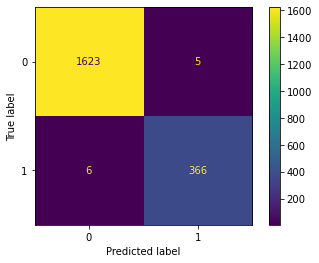

In [28]:


# Testing the models with a confusion matrix
# You can replace the model_.predict part with any model number to check confusion matrix for that specific model.
# Predictions on test set for confusion matrix
predictions = model5.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Conclusion

- We were able to calculate expected loss on given loan instance, using 4 different ML algorithms (Logistic Regression, 
   Support Vector Classifier, Random Forest Classifier, XGBoosting Classifier), and implemented 2 different strategies for combining algorithms (Stacking Classifier, Weighted Ensemble Strategy).

- We were able to compare each of these models for 5 different metrics (Accuracy, Precision, Recall, F1 Score, ROC AUC).

- Resulting metrics were around ~0.99 which means the models were either overfitted for the dataset, or the dataset could have an imbalance in defaulted vs non-defaulting customers, or even though there is a difference in the expected loss values, the prediction for defaulting were correct.